In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df = pd.read_csv('../../data/prep_survey_profile.csv', encoding='utf-8')
df.columns

Index(['What is your age (# years)?', 'What is your gender?',
       'In which country do you currently reside?',
       'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Select the title most similar to your current role (or most recent title if retired)',
       'What is the size of the company where you are employed?',
       'Approximately how many individuals are responsible for data science workloads at your place of business?',
       'Does your current employer incorporate machine learning methods into their business?',
       'What is your current yearly compensation (approximate $USD)?',
       'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?',
       'What is the primary tool that you use at work or school to analyze data?',
       'How long have you been writing code to analyze data (at work or at school)?',
       'What 

In [30]:
# Define the mapping of original column names to shorter names
column_mapping = {
    'What is your age (# years)?': 'Age',
    'What is your gender?': 'Gender',
    'In which country do you currently reside?': 'Country',
    'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'Education',
    'Select the title most similar to your current role (or most recent title if retired)': 'Job_Title',
    'What is the size of the company where you are employed?': 'Company_Size',
    'Approximately how many individuals are responsible for data science workloads at your place of business?': 'DS_Team_Size',
    'Does your current employer incorporate machine learning methods into their business?': 'ML_Usage',
    'What is your current yearly compensation (approximate $USD)?': 'Compensation',
    'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?': 'Cloud_Spend',
    'What is the primary tool that you use at work or school to analyze data?': 'Primary_Tool',
    'How long have you been writing code to analyze data (at work or at school)?': 'Coding_Exp',
    'What programming language would you recommend an aspiring data scientist to learn first?': 'Recommended_Lang',
    'Have you ever used a TPU (tensor processing unit)?': 'Used_TPU',
    'For how many years have you used machine learning methods?': 'ML_Exp'
}

# Rename the DataFrame columns
df = df.rename(columns=column_mapping)
df.head()

,Age,Gender,Country,Education,Job_Title,Company_Size,DS_Team_Size,ML_Usage,Compensation,Cloud_Spend,Primary_Tool,Coding_Exp,Recommended_Lang,Used_TPU,ML_Exp
0,40-44,Male,Australia,Master’s degree,Other,Enterprise,20+,I do not know,"250,000-299,999","$10,000-$99,999",Local development environments,1-2 years,Python,Used TPU,2-3 years
1,22-24,Male,India,Bachelor’s degree,Other,Small,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),Local development environments,< 1 years,Python,Never,< 1 years
2,22-24,Male,India,Master’s degree,Data Scientist,Medium,20+,We are exploring ML methods (and may one day p...,"10,000-14,999",$100-$999,Local development environments,3-5 years,Python,Used TPU,2-3 years
3,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,Enterprise,20+,"We recently started using ML methods (i.e., mo...","80,000-89,999",$0 (USD),Local development environments,3-5 years,Python,Used TPU,3-4 years
4,55-59,Male,Netherlands,Master’s degree,Other,Small,1-2,We are exploring ML methods (and may one day p...,$0-999,$100-$999,Local development environments,5-10 years,Python,Never,< 1 years


In [31]:
transaction_df = pd.get_dummies(df)
transaction_df.head()

,Age_18-21,Age_22-24,Age_25-29,Age_30-34,Age_35-39,Age_40-44,Age_45-49,Age_50-54,Age_55-59,Age_60-69,...,Used_TPU_Never,Used_TPU_Used TPU,ML_Exp_1-2 years,ML_Exp_10-15 years,ML_Exp_2-3 years,ML_Exp_20+ years,ML_Exp_3-4 years,ML_Exp_4-5 years,ML_Exp_5-10 years,ML_Exp_< 1 years
0,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True


In [72]:
# Step 1: Apply Apriori to find frequent itemsets
# Run the Apriori algorithm
frequent_itemsets = apriori(transaction_df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.136043,(Age_22-24)
1,0.257854,(Age_25-29)
2,0.202077,(Age_30-34)
3,0.134761,(Age_35-39)
4,0.130786,(Gender_Female)
...,...,...
460,0.111553,"(Used_TPU_Never, Primary_Tool_Local developmen..."
461,0.103603,"(Used_TPU_Never, Coding_Exp_1-2 years, ML_Exp_..."
462,0.159636,"(Used_TPU_Never, Gender_Male, Recommended_Lang..."
463,0.134248,"(Used_TPU_Never, Job_Title_Data Scientist, Gen..."


In [73]:
# Step 2: Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets), metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Age_22-24),(Gender_Male),0.136043,0.869214,0.115656,0.850141,0.978058,1.0,-0.002595,0.872729,-0.025310,0.130009,-0.145831,0.491600
1,(Age_22-24),(Recommended_Lang_Python),0.136043,0.801000,0.115143,0.846371,1.056643,1.0,0.006172,1.295330,0.062048,0.140094,0.227996,0.495060
2,(Age_25-29),(Gender_Male),0.257854,0.869214,0.218746,0.848334,0.975978,1.0,-0.005384,0.862330,-0.032100,0.240824,-0.159649,0.549997
3,(Age_25-29),(Recommended_Lang_Python),0.257854,0.801000,0.214515,0.831924,1.038607,1.0,0.007974,1.183990,0.050087,0.254062,0.155399,0.549866
4,(Age_25-29),(Used_TPU_Never),0.257854,0.778561,0.201436,0.781203,1.003393,1.0,0.000681,1.012075,0.004557,0.241247,0.011931,0.519966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,"(Primary_Tool_Local development environments, ...",(Used_TPU_Never),0.179126,0.778561,0.134248,0.749463,0.962626,1.0,-0.005212,0.883857,-0.045162,0.163033,-0.131405,0.460947
603,"(Used_TPU_Never, Primary_Tool_Local developmen...",(Recommended_Lang_Python),0.125144,0.801000,0.102193,0.816598,1.019473,1.0,0.001952,1.085050,0.021834,0.124027,0.078383,0.472090
604,"(Used_TPU_Never, Primary_Tool_Local developmen...",(Gender_Male),0.114758,0.869214,0.102193,0.890503,1.024492,1.0,0.002443,1.194423,0.027006,0.115894,0.162776,0.504036
605,"(Company_Size_Small, Primary_Tool_Local develo...",(Used_TPU_Never),0.133607,0.778561,0.102193,0.764875,0.982421,1.0,-0.001829,0.941792,-0.020235,0.126167,-0.061805,0.448067


In [74]:
# Convert 'itemsets' from frozenset to plain string
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

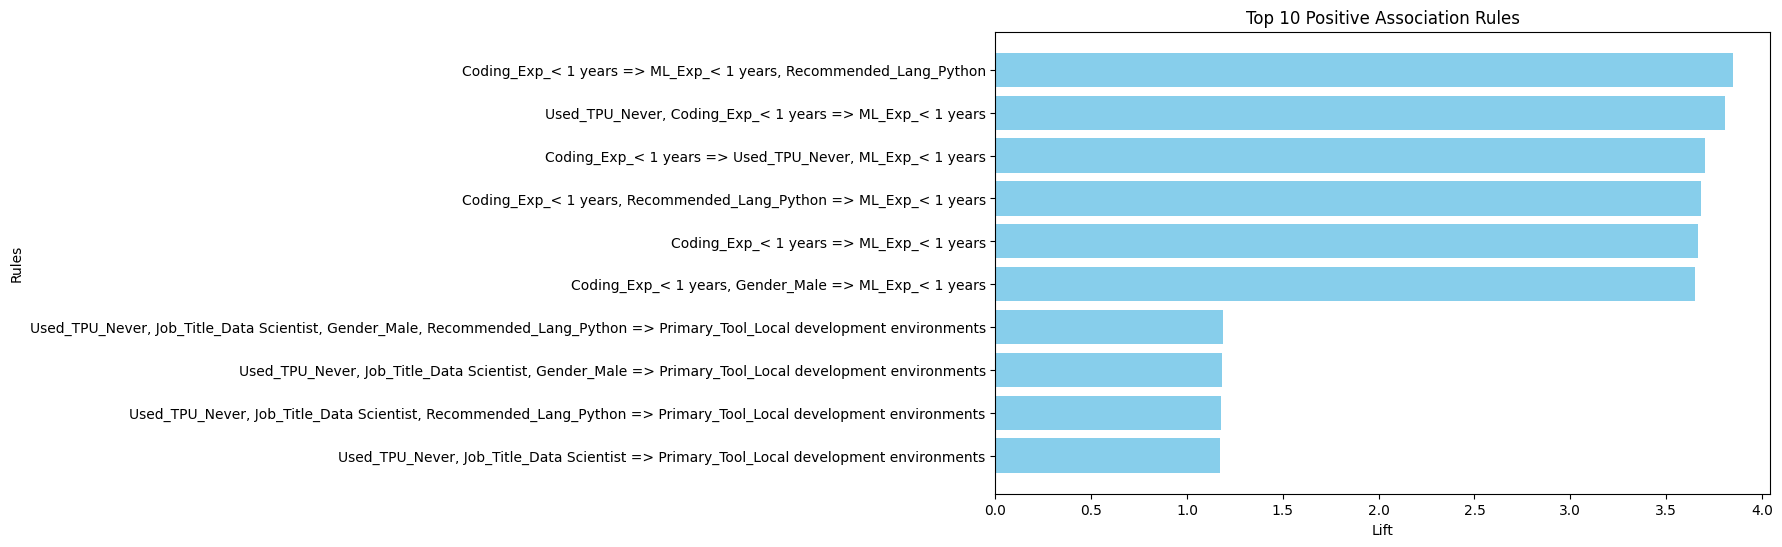

In [82]:
# Sort by 'lift' descending and select the top 10 rules
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(
    top_rules['antecedents'].astype(str) + " => " + top_rules['consequents'].astype(str),
    top_rules['lift'],
    color='skyblue'
)
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.title('Top 10 Positive Association Rules')
plt.gca().invert_yaxis()  # Strongest rule at the top
plt.show()

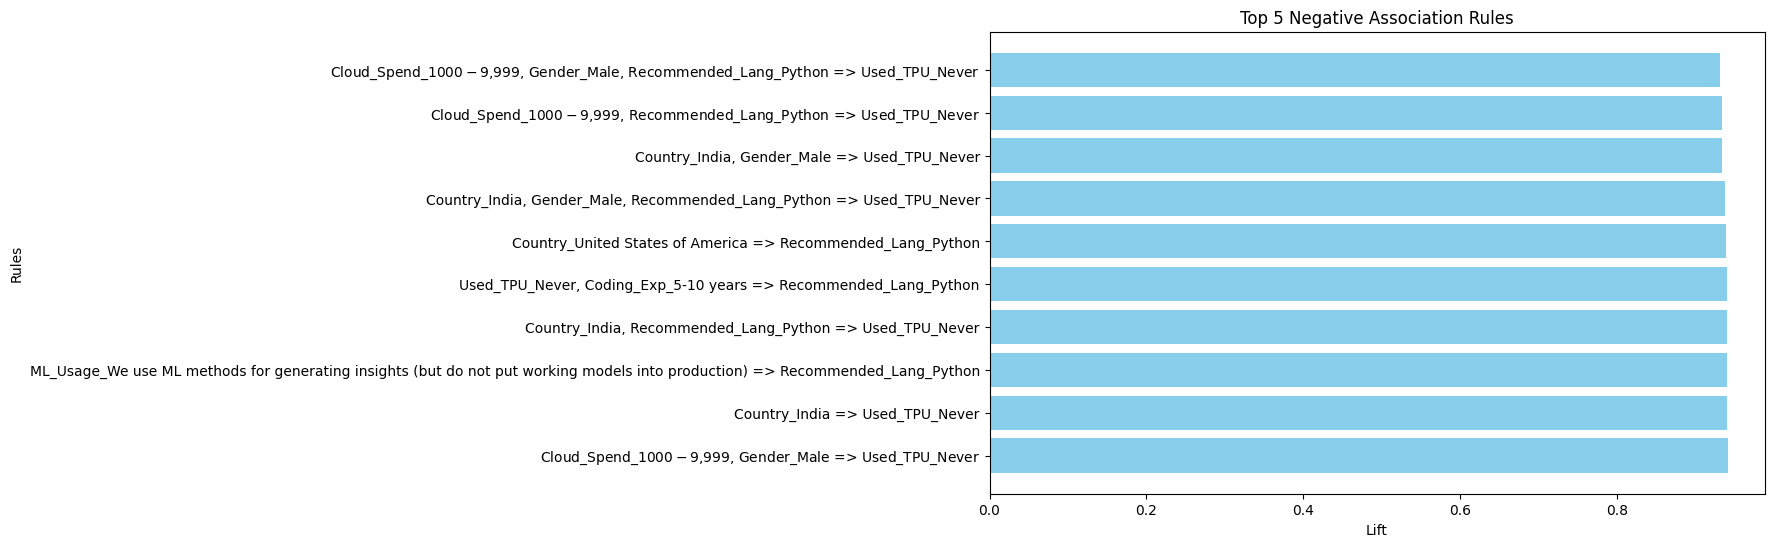

In [83]:
# Sort by 'lift' ascending and select the top 10 rules
top_rules = rules.sort_values(by='lift', ascending=True).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(
    top_rules['antecedents'].astype(str) + " => " + top_rules['consequents'].astype(str),
    top_rules['lift'],
    color='skyblue'
)
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.title('Top 5 Negative Association Rules')
plt.gca().invert_yaxis()  # Strongest rule at the top
plt.show()